<font size="5"><b>Lecture 03: Image Filtering (exercises)</b></font>

# EX1: spatial domain

## 1.1. Create lowpass kernel and convolve with scipy 

<div class="alert alert-success">
    Create a low-pass box filter kernel of size 3x3 using numpy. Then convolve the image with this kernel using the function convolve.ndimage() from the package <i>scipy, and plot the resulting image</i>.<br>
    <br>
    <u>Hint 1</u>: before convolving, remember to convert image to float<br>
    <u>Hint 2</u>: before plotting, remember to normalize the pixel values of the filtered image so as to be within the 0-1 range.<br>
</div>

In [42]:
from skimage import io

# Open image
f_img = 'images/Popocatepetl_HD_crop.jpg'
img = io.imread(f_img) #>> uint8

In [43]:
# Check datatype and pixel range
img.dtype, img.min(), img.max()

(dtype('uint8'), 0, 255)

In [44]:
# Convert 0-1 range and float64

# img = img / 255.0
# img = img / img.max()
import skimage
img = skimage.util.img_as_float(img) #>> float64

print(img.dtype, img.min(), img.max())

float64 0.0 1.0


In [16]:
# Create boxcar kernel
import numpy as np

shape = (5, 5, 3)
# shape = (20, 20, 3)  # test the effect of increasing kernel size
kernel = np.ones(shape) / 9

In [46]:
# Convolve kernel
from scipy import ndimage
# from scipy.ndimage import convolve

# # Utilizando key-word arguments (kwargs)
# ndimage.convolve(input=img, weights=kernel)

# # Utilizando arguments (args)
# ndimage.convolve(img, kernel)

# Utilizando arguments y kwargs
img_f = ndimage.convolve(img, weights=kernel, mode='mirror')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2.059694989106754 8.33333333333332


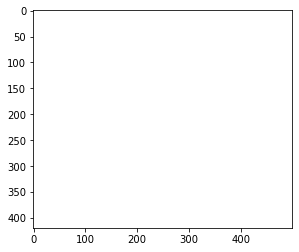

In [47]:
import matplotlib.pyplot as plt
plt.imshow(img_f)
print(img_f.min(), img_f.max())

In [51]:
# Normalize pixel range to ?-1
img_fn = img_f / img_f.max()
print(img_fn.min(), img_fn.max())

# Normalize pixel range to 0-1 (increase contrast)
img_fn = (img_f - img_f.min()) / (img_f.max()-img_f.min())
print(img_fn.min(), img_fn.max())

0.0 1.0
0.0 1.0


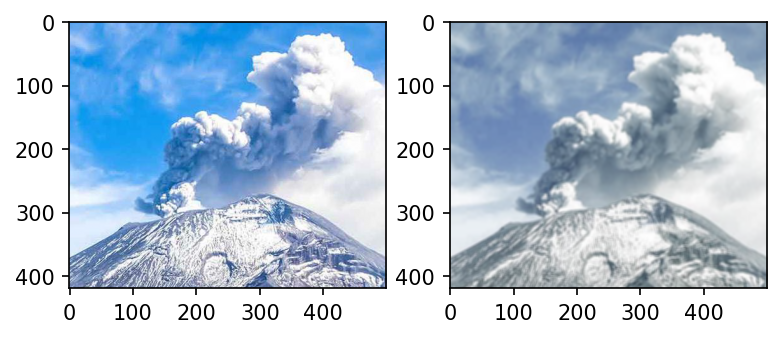

In [49]:
fig, axs = plt.subplots(1, 2, dpi=150)
axs[0].imshow(img)
axs[1].imshow(img_fn)

## 1.2. Create highpass kernel and convolve with scipy 

<div class="alert alert-success">
    Create a high-pass filter  kernel (extension of the Laplace kernel) of size 3x3 using numpy. Convert the image to grayscale, convolve with the kernel, and plot the resulting image.<br>
    <br>
    <u>Hint 1</u>: use the <i>skimage</i> function <a href="https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html" target="_blank">color.rgb2gray</a> to convert the image to grayscale.<br>
    <u>Hint 2</u>: before plotting, clip values >1 to 1, and <0 to 0 to ease visualization. Use the function numpy.where().
</div>

In [14]:
from skimage import io, color

f_img = 'images/Popocatepetl_HD_crop.jpg'
img = io.imread(f_img) #>> uint8
img = img / 255.0 #>> convert to float64 in range 0-1
img_g = color.rgb2gray(img) #>> convert to float64 in range 0-1


In [15]:
# Create kernel
import numpy as np
kernel = np.array([ [0,-1,0], [-1,4,-1], [0,-1,0] ])

# Convolve
from scipy import ndimage
img_gf = ndimage.convolve(img_g, kernel)

# Clip
img_gf = np.where(img_gf<0, 0, img_gf)
img_gf = np.where(img_gf>1, 1, img_gf)

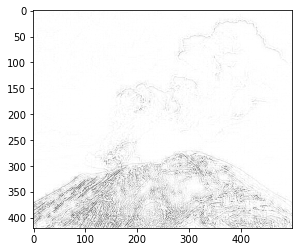

In [14]:
# Plot
import matplotlib.pyplot as plt

fig = plt.figure()
plt.imshow(img_gf, cmap='gray_r')

# Save figure
# plt.savefig('myfigure.png')
fig.savefig('myfigure.png')

## 1.3. Explore skimage filtering functions

<div class="alert alert-success">
    Try the scikit-image <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html" target="_blank">filters</a>.<br>
</div>

In [8]:
from skimage import io, filters, color
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# --- open image
f_img = 'images/Popocatepetl_HD_crop.jpg'
img = io.imread(f_img)


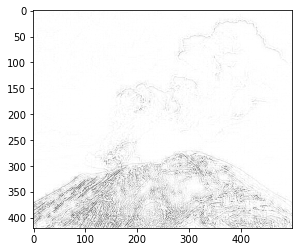

In [10]:
# --- Laplace filter

# pre-processing
img = img / 255.0 #>> convert to float64 in range 0-1
# img_g = 0.2125*img[:,:,0] + 0.7154*img[:,:,1] + 0.0721*img[:,:,2] 
img_g = color.rgb2gray(img)

# filter
img_f = filters.laplace(img_g)

# post-processing
img_f = np.where(img_f<0, 0, img_f)
img_f = np.where(img_f>1, 1, img_f)

# plot
plt.imshow(img_f, cmap='gray_r')

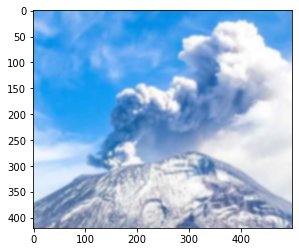

In [11]:
# --- Gaussian filter
img = filters.gaussian(img, sigma=2)
plt.imshow(img)

In [12]:
# --- Butterworth filter (frequency domain)

img_f_highpass = filters.butterworth(img_g, high_pass=True, cutoff_frequency_ratio=0.1)
img_f_lowpass = filters.butterworth(img_g, high_pass=False, cutoff_frequency_ratio=0.1)

img_resconstructed = img_f_highpass + img_f_lowpass

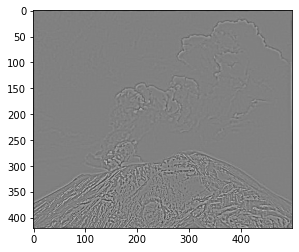

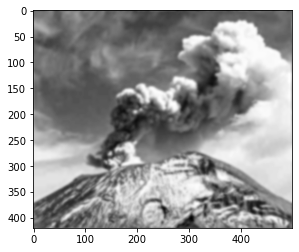

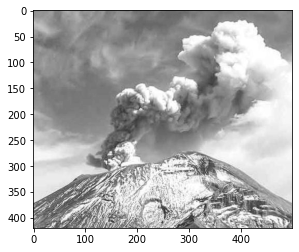

In [13]:
plt.figure()
plt.imshow(img_f_highpass, cmap='gray')

plt.figure()
plt.imshow(img_f_lowpass, cmap='gray')

plt.figure()
plt.imshow(img_resconstructed, cmap='gray')

## 1.4. Build your own function(s) to convolve a filter kernel with an image

### create zero-padding function

<div class="alert alert-success">
    <b>1.</b> Build a function to pad an image with zeros, adapting to various filter kernel sizes.<br>
    The function should take the original image and kernel shape as inputs, and return the zero-padded image.<br>
    The function should handle both grayscale (2D) and color (3D) images.<br><br>
    <u>Hint 1</u>: use numpy's <a href="https://numpy.org/doc/stable/reference/generated/numpy.pad.html" target="_blank">pad()</a> function<br>
    <u>Hint 2</u>: the number of values to pad (i.e., "pad_width") to both X and Y image axis can be taken as the floor division of the kernel shape of each axis. In the case of color images (3D), the third axis (depth) should not be padded, set pad_width to 0.
</div>

<div class="alert alert-success">
    <b>2.</b> Plot a demo with a (10,10) or (10,10,3) image (composed of random integers ranging between 0-255), and a 3x3 kernel.<br>
    <u>Hint</u>: you can use numpy's <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html" target="_blank">random.randint()</a> function to create a random image.<br>
    <br>
    Apply to the "Popocatepetl_HD_crop.jpg" image located in the sub-directory "images".
</div>

### create convolution function

<div class="alert alert-success">
    <b>1.</b> Build a function to convolve an image by a kernel.<br>
    The function should take the original image and kernel as inputs, and return the convolved image.<br>
    <br>
    Start with a function supporting grayscale images (2D). (Adapt to support color images (3D), or create a distinct function to handle them).<br>
    <br>
    <u>Hint 1</u>: remember that your function should first <u>zero-pad</u> the original image (using the function previously created), and afterwards loop over its X, Y (and Z) axis to filter the image at pixel coordinate (x,y,(z)).<br>
    <br>
    <u>Hint 2</u>: remember that in order to <u>convolve</u> an "image crop" with a "filter kernel", you should compute the element-wise product of the crop and the filter kernel, and return the sum the resulting array. The returned value corresponds to the new pixel value at coordinate (x,y,(z)) of the new filtered image (which you'll have previously created as an empty array filled with zeros, having the same dimension as your padded image).<br>
    <br>
    <u>Hint 3</u>: remember that the returned filtered image should have the same size as the original image (i.e., remove padded pixels!)
</div>

### create your own kernels and convolve!

### boxcar filter

<div class="alert alert-success">
    <b>1.</b> Create an <u>averaging kernel</u> (box-filter), whereby the convolved pixel will have the mean value of the pixels in the kernel neighborhood. Use an odd-shaped kernel (e.g., 3x3, 5x5, etc.).<br>
    <br>
    Test on a grayscale version of "Popocatepetl_HD_crop.jpg" (use skimage.color.rgb2gray() to convert to grayscale). Test various kernel sizes.<br>
    <br>
    Test on the color version of "Popocatepetl_HD_crop.jpg". What shape should your kernel have?<br>
    (If your function only supports 2D images, use it on each band, and use np.dstack() to reconstruct the RGB filtered image). 
</div>

### gaussian filter

<div class="alert alert-success">
    <b>1.</b> Create a <u>gaussian kernel</u><br>
    <br>
    <u>Hint 1</u>: use the 1D Gaussian distribution formula: <a href="https://en.wikipedia.org/wiki/Normal_distribution" target="_blank">wikipedia</a><br>
    <u>Hint 2</u>: create an odd-size kernel whose size is 6 times the chose standard deviation sigma ( 99% of the probability mass for a gaussian is within +/-3 sigma).<br>
    <u>Hint 3</u>: populate the kernel coefficients by computing the 2D gaussian distribution. Set the distribution peak to be at the kernel center (mu=0), and calulate the distance x to the peak using Pythagore.
</div>

<div class="alert alert-success">
    <b>2.</b> Try using the scikit-image <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html" target="_blank">filters.gaussian()</a> implementation. Is it faster than yours?<br>
</div>

<div class="alert alert-success">
    <b>3.</b> Recover the high-frequency component from your filtered image.<br>
    <u>Hint</u>: remember a Gaussian filter is a true low-pass filter for the image.
</div>

### sobel filter

<div class="alert alert-success">
    <b>1.</b> Create two <u>sobel kernels</u>, to compute respectively gradients in x- and y-directions on a grayscale image.<br>
    <u>Hint 1</u>: check out the formulation here: <a href="https://en.wikipedia.org/wiki/Sobel_operator#Formulation" target="_blank">wikipedia</a><br>
    <br>
    Plot the image filtered with both filters. 
</div>

# EX2: frequency domain filtering

## compute the 2D discrete Fourier transform

<div class="alert alert-success">
    <b>1.</b> Compute the 2D discrete Fourier transform of your grayscale image.<br>
    <u>Hint</u>: use numpy's <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html" target="_blank">np.fft.fft2()</a> function, and <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html" target="_blank">np.fft.fftshift()</a> to get frequency 0 at center of image.<br>
    <br>2. Plot the amplitude spectrum of the image.<br>
    <u>Hint</u>: remember that the discrete Fourier Transform returned from np.fft.fft2() is complex. Take the abs() value to get the amplitude.
</div>

## create a low-pass function

<div class="alert alert-success">
    Create a function to low-pass the FFT spectrum, i.e., cut-off the high frequencies of the spectrum.<br>
    <br>
    <u>Hint</u>: create a mask having the same size as your Fourier transform spectrum, and set value to 1 at low frequencies, and to 0 at high frequencies. Multiply your spectrum by this mask to obtain a low-pass filtered spectrum.<br>
</div>

## reconstruct the low-pass filtered image

<div class="alert alert-success">
    Reconstruct the image from your low-pass filtered spectrum.<br>
    <br>
    <u>Hint</u>: Compute the inverse Fourier transform on the low-pass filtered spectrum using numpy's <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html" target="_blank">np.fft.ifft2()</a> function.<br>Take the real part of the result to reconstruct the low-pass filtered image.
</div>